In [82]:
#lets import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
#to evaluate the model

In [83]:
#work flow
# i have gold price date for 10 years, so lets use this data and train algo,so that we can predict for new values.
# once we have data, lets ppreprocess the data.
# lets do analysis,to find which features are imp and which features are corellated to each other and some visualization techniques
# use train data to train model and test it with test data
# lets use randomforest regressor and feed data.

In [84]:
random_reg = pd.read_csv('C:\\Users\\welcome\\Desktop\\gld_price_data.csv')

In [85]:
random_reg.head()
#spx stock value
#gld is the gold price
# us oil price these dates
# silver price value and  currency pair
# 1.47 represents 1 euro is equal to 1.47 usd
# i can feed the features that were tagged to gold price to my model.
# predicting gold price based on these stock prices


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [86]:
random_reg.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [87]:
random_reg.shape

(2290, 6)

In [88]:
random_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [89]:
random_reg.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [90]:
random_reg['EUR/USD'].value_counts()

1.437298    4
1.338993    3
1.229407    3
1.319087    3
1.296496    3
           ..
1.106305    1
1.353418    1
1.579205    1
1.373419    1
1.386001    1
Name: EUR/USD, Length: 2066, dtype: int64

In [91]:
for i in random_reg['Date']:
    print(i)
#10 years data set

1/2/2008
1/3/2008
1/4/2008
1/7/2008
1/8/2008
1/9/2008
1/10/2008
1/11/2008
1/14/2008
1/15/2008
1/16/2008
1/17/2008
1/18/2008
1/22/2008
1/23/2008
1/24/2008
1/25/2008
1/28/2008
1/29/2008
1/30/2008
1/31/2008
2/1/2008
2/4/2008
2/5/2008
2/6/2008
2/7/2008
2/8/2008
2/11/2008
2/12/2008
2/13/2008
2/14/2008
2/15/2008
2/19/2008
2/20/2008
2/21/2008
2/22/2008
2/25/2008
2/26/2008
2/27/2008
2/28/2008
2/29/2008
3/3/2008
3/4/2008
3/5/2008
3/6/2008
3/7/2008
3/10/2008
3/11/2008
3/12/2008
3/13/2008
3/14/2008
3/17/2008
3/18/2008
3/19/2008
3/20/2008
3/24/2008
3/25/2008
3/26/2008
3/27/2008
3/28/2008
4/1/2008
4/2/2008
4/3/2008
4/7/2008
4/8/2008
4/9/2008
4/10/2008
4/14/2008
4/15/2008
4/16/2008
4/17/2008
4/21/2008
4/22/2008
4/23/2008
4/24/2008
4/28/2008
4/29/2008
5/1/2008
5/5/2008
5/6/2008
5/7/2008
5/8/2008
5/12/2008
5/13/2008
5/14/2008
5/15/2008
5/19/2008
5/20/2008
5/21/2008
5/22/2008
5/27/2008
5/28/2008
5/29/2008
6/2/2008
6/3/2008
6/4/2008
6/5/2008
6/9/2008
6/10/2008
6/11/2008
6/12/2008
6/16/2008
6/17/2008
6/1

In [92]:
random_reg.describe()
#lrt us get some statisticl values
# count- data points
# mean for all the coloums and std
# percentiles


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [93]:
#lets find correlation between features..
# correlation - which coloumn is related to each other..
# positive correlation - when one variable increase then other variable increases (directly proportional)
# negative correlation - when one variable decrease then other variable increases (inversely proportional)
correlation = random_reg.corr()


<AxesSubplot:>

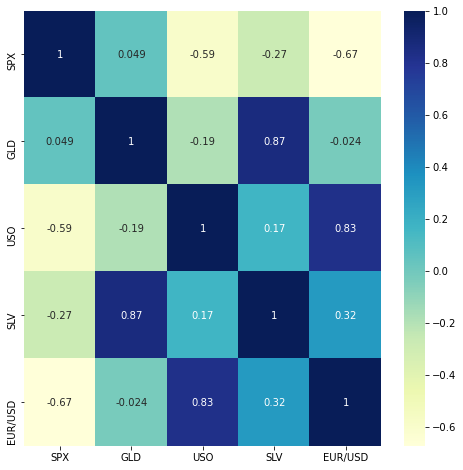

In [94]:
# constructing the heat map to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cmap="YlGnBu", annot = True )

In [95]:
# NEGATIVE correlations has negative value
# positive correlations has positive value
# here gold and silver are positively correlated..if gold value increases then my silver also increases


In [96]:
#correlation values of gld
print(correlation['GLD'])
    

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

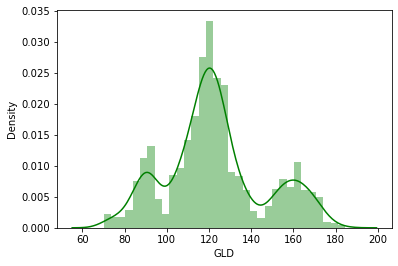

In [97]:
#checking the distribution of the gold price
sns.distplot(random_reg['GLD'], color = 'green')

In [98]:
# majority of the values are in 120
# target - gold price
# x- other features
# splitting the features and the target

In [99]:
x = random_reg.drop(['Date','GLD'], axis = 1)
y = random_reg['GLD']

In [100]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [101]:
print(y) 

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [102]:
# spliting into training and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

In [103]:
X_train.shape

(1832, 4)

In [104]:
Y_train.shape

(1832,)

In [105]:
# we loaded the randomforestregressor to the variable regressor
regressor = RandomForestRegressor(n_estimators=100)

In [106]:
#lets train the model
# fit func will fit the model with our data, by this my model will be trained.
regressor.fit(X_train,Y_train) 

RandomForestRegressor()

In [107]:
# prediction on Test Data
# MODEL EVALUATION - BASED ON TEST DATA
# PREDICT FUN TO PREDICT THE TEST DATA VALUES
test_data_prediction = regressor.predict(X_test)

In [108]:
# PREDICTED VALUES BY MY MODEL
test_data_prediction

array([168.55729937,  81.8275998 , 116.06839999, 127.67110076,
       120.68470104, 154.82739791, 150.240498  , 126.30470008,
       117.34859872, 126.00500052, 116.79990087, 171.72060104,
       141.67749869, 167.92339826, 115.22080029, 117.43310054,
       138.87470307, 170.32600112, 160.00220254, 156.62209918,
       155.17220041, 125.29439998, 175.52099954, 157.13520344,
       125.28900053,  93.97119974,  78.23859979, 120.44430023,
       119.08459936, 167.53009964,  88.11340035, 125.27159989,
        91.13420112, 117.69550039, 121.23249942, 136.76960054,
       115.56070125, 114.94490084, 147.98009965, 107.48190143,
       104.23170236,  87.25119794, 126.4959007 , 117.8493004 ,
       153.64439924, 119.4988998 , 108.56799968, 107.82729808,
        93.19830048, 127.20399724,  75.28960029, 113.59329895,
       121.39789998, 111.10329925, 118.71579885, 120.3738996 ,
       158.81519939, 168.9144011 , 147.00589643,  86.11829857,
        94.21280027,  86.9550987 ,  90.61730052, 119.04

In [109]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [110]:
#NOW I CAN COMPARE PREDICTED WITH ACTUAL VALUES
# R squared error
# MENTION THE REAL AND PREDICTED VALUES
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9886530559260357


 classification 

Input variables (based on physicochemical tests):<BR>
1 - fixed acidity<BR>
2 - volatile acidity<BR>
3 - citric acid<BR>
4 - residual sugar<BR>
5 - chlorides<BR>
6 - free sulfur dioxide<BR>
7 - total sulfur dioxide<BR>
8 - density<BR>
9 - pH<BR>
10 - sulphates<BR>
11 - alcohol<BR>
Output variable (based on sensory data):<BR>
12 - quality (score between 0 and 10)<BR>

In [111]:
wine = pd.read_csv("C:\\Users\\welcome\\Desktop\\winequality-red.csv")

In [112]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [113]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [114]:
wine.shape

(1599, 12)

In [115]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [116]:
wine.describe()
# statistical measures of the dataset
# we can check the range of each coloumn

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [117]:
wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [118]:
# checking for missing values
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

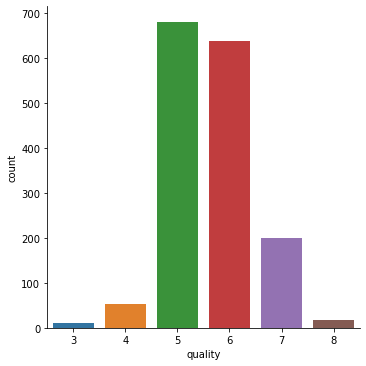

In [119]:
# visualizing quality feature
# number of values for each quality (coloumn)
sns.catplot(x='quality', data = wine, kind ='count' )
#count - to find number of values

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

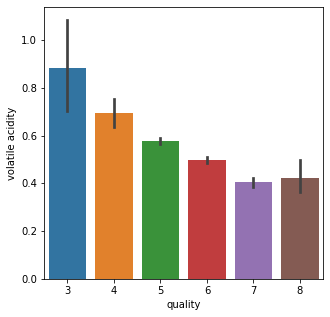

In [120]:
# if wine quality is high in this plot then it is good.
# lets do some analysis and check which is corellated with quality coloumn.
# check correlation   and check also relation between other random coloumns.
plot = plt.figure(figsize=(5,5))
sns.barplot(x= 'quality',y= 'volatile acidity', data= wine )
# here volatile acidity and quality are inversely proportional

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

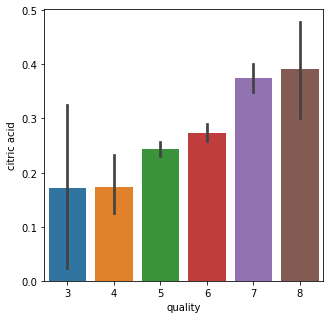

In [121]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid', data= wine)
# here citric acid is directly proportional to quality..
# Another inference of these features..

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

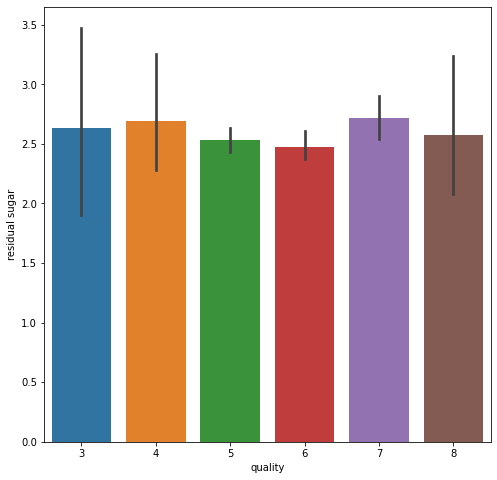

In [122]:
plot = plt.figure(figsize=(8,8))
sns.barplot(x='quality',y='residual sugar', data= wine)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

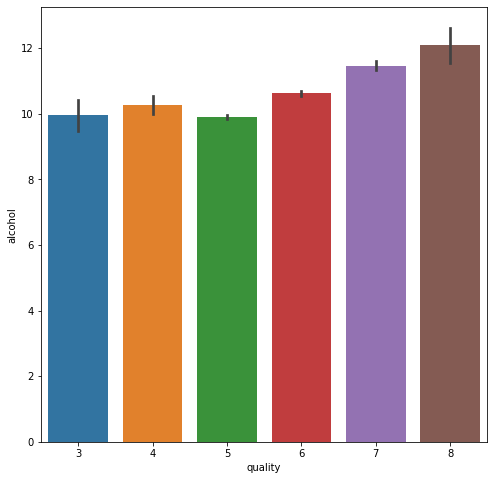

In [123]:
plot = plt.figure(figsize=(8,8))
sns.barplot(x='quality',y='alcohol', data= wine)

Correlation

Positive Correlation<br>
Negative Correlation

In [124]:
correlation = wine.corr()
# we can which is positively and negatively correlated

<AxesSubplot:>

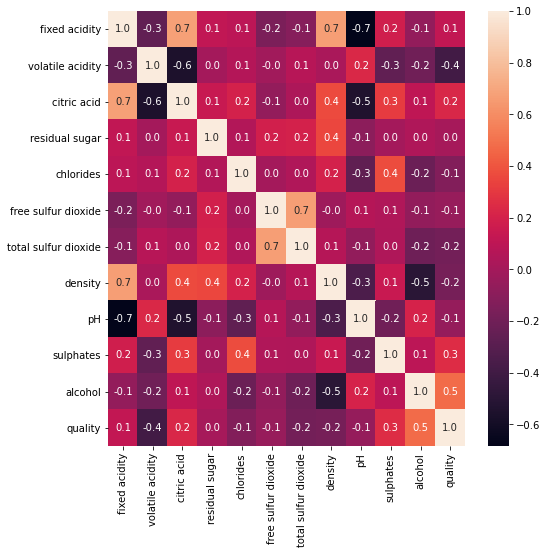

In [125]:
plot = plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,annot=True,fmt='.1f')

Data Preprocessing

In [126]:
# separate the data and Label
x= wine.drop('quality', axis =1)


In [127]:
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [128]:
# binarizing values to 2 particular values.. good or bad
# lets binarize and store it in y, replace all the values to 0 and 1.
# use apply function, use lambda function for these kind of operations to replace values.
y=wine['quality'].apply(lambda y_val: 1 if y_val>= 7 else 0)

In [129]:
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [130]:
#Train & Test Split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=3)

Model Training:

Random Forest Classifier

In [131]:
classifier_model = RandomForestClassifier()

In [132]:
classifier_model.fit(X_train,Y_train)

RandomForestClassifier()

Model Evaluation

Accuracy Score

In [133]:
prediction = classifier_model.predict(X_test)

In [134]:
test_data_accuracy = accuracy_score(prediction, Y_test)

In [135]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.93125


Building a Predictive System

In [142]:
input_data_for_prediction = (11.6,0.42,0.53,3.3,0.105,33.0,98.0,1.001,3.2,0.95,9.2)

# changing the input data to a numpy array( converting my tuple to numpy array), use function np.asarray
input_data_as_numpy_array = np.asarray(input_data_for_prediction)

# now i need to reshape my data
# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

Bad Quality Wine
